In [180]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [181]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold

In [182]:
import warnings
warnings.filterwarnings('ignore')

In [183]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [184]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1551,6518-KZXCB,Male,0,No,No,22,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.25,566.5,No
991,8361-LBRDI,Female,0,No,No,58,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.35,1423.85,No
4383,1088-CNNKB,Male,0,Yes,No,63,Yes,Yes,DSL,Yes,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),80.00,5040.2,No
1570,3070-FNFZQ,Female,0,Yes,Yes,23,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.40,478.75,No
5203,0734-OXWBT,Male,0,No,Yes,3,Yes,No,DSL,No,...,No,Yes,Yes,Yes,Month-to-month,No,Mailed check,70.70,225.65,No


In [185]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

strings = list(df.dtypes[df.dtypes == 'object'].index)
for c in strings:
    df[c] = df[c].str.lower().str.replace(' ', '_')
    

df.totalcharges = pd.to_numeric(df.totalcharges, errors = 'coerce')
df.totalcharges = df.totalcharges.fillna(0)
df.churn = (df.churn =='yes').astype('int')


# Validation Framework

In [186]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 101)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 101)
len(df_train), len(df_test), len(df_val)

(4225, 1409, 1409)

In [187]:
#Splitting into train, validation and testing
df_train = df_train.reset_index(drop = True)
df_val =  df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

y_train = df_train['churn']
y_val = df_val['churn']
y_test = df_val['churn']

del df_train['churn']
del df_val['churn']
del df_test['churn']

# Exploratory Analysis
-Churn ratio(difference)
-Risk ratio
-mutual Information

In [188]:
#global churn ratio
df_full_train = df_full_train.reset_index(drop = 'True')
g_churn = df_full_train.churn.mean()
round(g_churn, 2)

0.26

In [189]:
#Let's look at churn & risk ratio of each feature
Numberical= ['tenure', 'monthlycharges', 'totalcharges']

categorical= ['gender', 'seniorcitizen', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [190]:
from IPython.display import display
for c in cat:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - g_churn
    df_group['risk'] = df_group['mean'] / g_churn
    display (df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.263764,2779,0.000008,1.000031
male,0.263748,2855,-0.000008,0.999970




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.233645,4708,-0.030111,0.885838
1,0.416847,926,0.153091,1.580427




partner


,mean,count,diff,risk
partner,,,,
no,0.331721,2894,0.067965,1.257682
yes,0.191971,2740,-0.071785,0.727835




dependents


,mean,count,diff,risk
dependents,,,,
no,0.311996,3968,0.048240,1.182897
yes,0.148860,1666,-0.114896,0.564384




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.256121,531,-0.007635,0.971052
yes,0.264550,5103,0.000794,1.003012




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.249817,2730,-0.013939,0.947152
no_phone_service,0.256121,531,-0.007635,0.971052
yes,0.281500,2373,0.017744,1.067276




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.189245,1934,-0.074511,0.717501
fiber_optic,0.415193,2488,0.151437,1.574157
no,0.071782,1212,-0.191974,0.272154




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.412951,2826,0.149195,1.565657
no_internet_service,0.071782,1212,-0.191974,0.272154
yes,0.145363,1596,-0.118392,0.551129




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.399356,2484,0.135600,1.514112
no_internet_service,0.071782,1212,-0.191974,0.272154
yes,0.210010,1938,-0.053745,0.796230




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.390097,2484,0.126341,1.479007
no_internet_service,0.071782,1212,-0.191974,0.272154
yes,0.221878,1938,-0.041878,0.841226




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.413191,2805,0.149435,1.566566
no_internet_service,0.071782,1212,-0.191974,0.272154
yes,0.148423,1617,-0.115333,0.562729




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.329915,2243,0.066160,1.250836
no_internet_service,0.071782,1212,-0.191974,0.272154
yes,0.302432,2179,0.038677,1.146638




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.336331,2224,0.072575,1.275160
no_internet_service,0.071782,1212,-0.191974,0.272154
yes,0.296178,2198,0.032423,1.122927




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.424340,3106,0.160584,1.608837
one_year,0.112931,1160,-0.150825,0.428165
two_year,0.027047,1368,-0.236709,0.102545




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.156019,2301,-0.107737,0.591529
yes,0.338134,3333,0.074378,1.281996




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168831,1232,-0.094925,0.640104
credit_card_(automatic),0.145591,1202,-0.118165,0.551991
electronic_check,0.449001,1902,0.185245,1.702336
mailed_check,0.191834,1298,-0.071922,0.727315


In [191]:
#Relationship between categorical and feature
def mutual_infor_score(series):
    return mutual_info_score(series, df_full_train.churn)

g = df_full_train[categorical].apply(mutual_infor_score)
g.sort_values(ascending = False)

contract            9.837127e-02
onlinesecurity      6.391593e-02
techsupport         6.331077e-02
internetservice     5.515416e-02
onlinebackup        4.799016e-02
deviceprotection    4.447086e-02
paymentmethod       4.425758e-02
streamingmovies     3.228466e-02
streamingtv         3.189559e-02
paperlessbilling    2.161082e-02
dependents          1.539029e-02
partner             1.271967e-02
seniorcitizen       1.101683e-02
multiplelines       5.962224e-04
phoneservice        1.570747e-05
gender              1.675088e-10
dtype: float64

In [192]:
#Feature importance for numerical features
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.356483
monthlycharges    0.191459
totalcharges      0.202735
dtype: float64

# One Hot Encoding

In [193]:
dic = df_train[categorical  + numerical].to_dict(orient = 'records')
d_val = df_val[categorical  + numerical].to_dict(orient = 'records')

v = DictVectorizer(sparse = False)
X_train = v.fit_transform(dic)

X_val = v.transform(d_val)

# Model

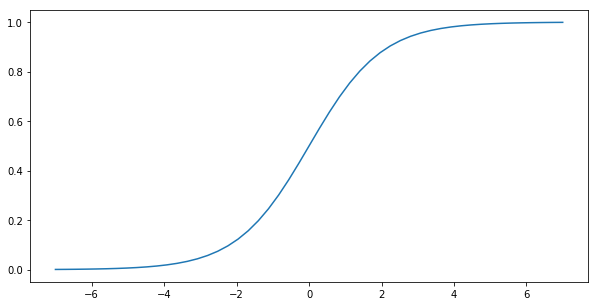

In [194]:
#Logistic regression
plt.figure(figsize = (10,5))
def sigmoid(z):
    return 1/(1+np.exp(-z))

z = np.linspace(7, -7,51)
plt.plot(z, sigmoid(z))

In [195]:
Lr = LogisticRegression()
Lr.fit(X_train, y_train)

LogisticRegression()

In [207]:
from sklearn.metrics import accuracy_score
y_pred = Lr.predict_proba(X_val)[:, 1]
churn_decision = (y_pred > 0.5)
accuracy_score(y_val, churn_decision)

0.7934705464868701

In [212]:
#Compute the confusion_matrix
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)
t = 0.5
predicted_positive = (y_pred > t)
predicted_negative = (y_pred < t)

tp = (actual_positive & predicted_positive).sum()
tn = (actual_negative & predicted_negative).sum()
fp = (predicted_positive & actual_negative).sum()
fn = (predicted_negative & actual_positive).sum()

In [224]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[915, 125],
       [166, 203]], dtype=int64)

In [223]:
from sklearn.metrics import classification_report
print(classification_report(y_val, churn_decision))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1040
           1       0.62      0.55      0.58       369

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



# Cross_Validation

In [157]:
def train(df_train, y_train, C = 1.0):
    dicts = df_train[categorical + numerical].to_dict(orient = 'records')
    dv = DictVectorizer(sparse = False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(C = C, max_iter = 1000)
    model.fit(X_train, y_train)
    return dv, model

In [158]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient = 'records')
    x = dv.transform(dicts)
    y_pred = model.predict_proba(x)[:, 1]
    
    return y_pred

In [159]:
C = 1.0
n_splits = 5

In [177]:
kfold = KFold(n_splits = n_splits, shuffle = True, random_state = 101)
scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    
    df_val = df_full_train.iloc[val_idx]
    y_train = df_train.churn.values
    y_val = df_val.churn.values
    dv, model = train(df_train, y_train, C = C)
    y_pred = predict(df_val, dv, model)
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)
    print('%.2f %.3f'%(np.mean(scores), np.std(scores)))

0.84 0.000
0.84 0.003
0.84 0.002
0.85 0.013
0.85 0.012


In [172]:
dv, model = train(df_full_train, df_full_train.churn.values, C = 1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)